# K nearest neigbhor from scratch

To start, let's make the following imports and set a style for matplotlib

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import warnings
from math import sqrt
import pandas as pd
from collections import Counter
import random
style.use('fivethirtyeight')

We're going to use warnings to avoid using a lower K value than we have groups, math for the square root functionality, at least initially (since I will show a more efficient method), and then Counter from collections to get the most popular votes.
Next, we create some data:

In [2]:
dataset = {'k':[[1,2],[2,3],[3,1]], 'r':[[6,5],[7,7],[8,6]]}
new_features = [5,7]

The dataset is just a Python dictionary with the keys being the color of the points (think of these as the class), and then the datapoints that are attributed with this class. If you recall our breast cancer dataset, the classes were numbers, and often times will be numbers to work with scikit-learn. For example, "benign" was translated to being given an arbitrary number of "2" and malignant was given the number of "4" in the dataset, rather than a string. This is mainly because Scikit-Learn simply required use to use numbers, but you do not inherently actually need to use numbers for your classes with a K Nearest Neighbors classifier. Next, we just specify a simple data set, 5,7 to be data we want to test. We can create a quick graph by doing:

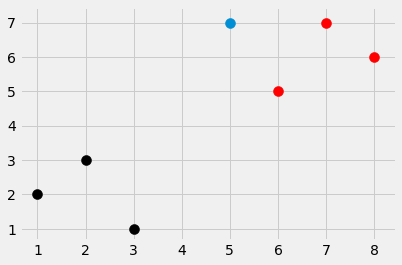

In [3]:
[[plt.scatter(ii[0],ii[1],s=100,color=i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_features[0], new_features[1], s=100)

plt.show()

In [ ]:
"""The line that is [[plt.scatter(ii[0],ii[1],s=100,color=i) for ii in dataset[i]] for i in dataset] 
is the same as:"""

"""for i in dataset:
    for ii in dataset[i]:
        plt.scatter(ii[0],ii[1],s=100,color=i)"""

The way I am going to handle this task is to create a Python list, which will contain another list, which will contain the distance, followed by the class, per point in our dataset. Once populated, we can sort the list by distance, take the first k values from that list, find the most popular, and we have our answer!

In [4]:
def k_nearest_neighbors(data, predict, k=3):
    if len(data) >= k:
        warnings.warn('K is set to a value less than total voting groups!')
        
    distances = []
    for group in data:
        for features in data[group]:
            euclidean_distance = np.linalg.norm(np.array(features)-np.array(predict))
            distances.append([euclidean_distance,group])

    print("these are distances",distances)
    print("these are sorted distances", sorted(distances))
    print("\n")
    votes = [i[1] for i in sorted(distances)[:k]]
    print("This is votes", votes)
    vote_result = Counter(votes).most_common(1)[0][0]
    print("this is vote result", vote_result)
    print("Counter(votes).most_common(1)[0][1]", Counter(votes).most_common(1)[0][1])
    confidence = Counter(votes).most_common(1)[0][1]/k
    
    return vote_result,confidence

these are distances [[6.4031242374328485, 'k'], [5.0, 'k'], [6.324555320336759, 'k'], [2.2360679774997898, 'r'], [2.0, 'r'], [3.1622776601683795, 'r']]
these are sorted distances [[2.0, 'r'], [2.2360679774997898, 'r'], [3.1622776601683795, 'r'], [5.0, 'k'], [6.324555320336759, 'k'], [6.4031242374328485, 'k']]


This is votes ['r', 'r', 'r']
this is vote result r
Counter(votes).most_common(1)[0][1] 3


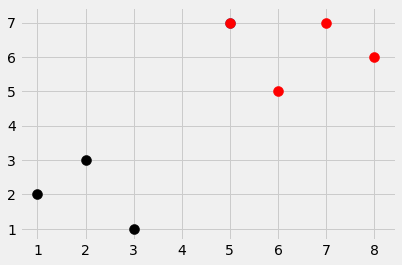

In [5]:
[[plt.scatter(ii[0],ii[1],s=100,color=i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_features[0], new_features[1], s=100)

result,confidence = k_nearest_neighbors(dataset, new_features)
plt.scatter(new_features[0], new_features[1], s=100, color = result)  
plt.show()

Now, we're going to revisit the breast cancer dataset that tracked tumor attributes and classified them as benign or malignant. The Scikit-Learn K Nearest Neighbors gave us ~95% accuracy on average, and now we're going to test our own algorithm.

In [6]:
df = pd.read_csv('breast-cancer-wisconsin.data')
df.replace('?',-99999, inplace=True)
df.drop(['id'], 1, inplace=True)
full_data = df.astype(float).values.tolist()

random.shuffle(full_data)
test_size = 0.2
train_set = {2:[], 4:[]}
test_set = {2:[], 4:[]}
train_data = full_data[:-int(test_size*len(full_data))]
test_data = full_data[-int(test_size*len(full_data)):]

In [7]:
for i in train_data:
    train_set[i[-1]].append(i[:-1])

for i in test_data:
    test_set[i[-1]].append(i[:-1])

First we shuffle the data (which contains both the features and labels). Then we prepare a dictionaries for the training and testing set to be populated. Next, we specify which chunk is the train_data and which is the test_data. We do this by selecting the first 80% as train_data (by doing logic that says to slice the list up to the last 20%), and then we create the test_data by slicing the final 20% of the shuffled data.

Now we populate the dictionaries. If it is not clear, the dictionaries have two keys: 2 and 4. The 2 is for the benign tumors (the same value the actual dataset used), and the 4 is for malignant tumors, same as the data. We're hard coding this, but one could take the classification column, and create a dictionary like this with keys that were assigned by unique column values from the class column. We're just going to keep it simple for now, however. 

In [ ]:
"""correct = 0
total = 0

for group in test_set:
    for data in test_set[group]:
        vote,confidence = k_nearest_neighbors(train_set, data, k=5)
        if group == vote:
            correct += 1
        total += 1
print('Accuracy:', correct/total)"""